# Dimension Reduction

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Principal components analysis (PCA) 

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables. 
   * For categorical variables, other methods such as correspondence analysis are more suitable. 

In [2]:
Cereals = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'

In [3]:
cereals_df = pd.read_csv(Cereals)
df = cereals_df.copy()
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [4]:
df.shape

(77, 16)

For each cereal, the data include 13 numerical variables, and we are interested in reducing this dimension.

Principal Component Analysis can tell you what variables in your data are the most important. 

We focus first on two variables: `calories` and consumer `rating`: 

In [5]:
ndf = df[['calories', 'rating']]
ndf.corr()

,calories,rating
calories,1.000000,-0.689376
rating,-0.689376,1.000000


In [9]:
df.calories.mean()

106.88311688311688

In [10]:
df.rating.mean()

42.66570498701299

In [11]:
Varience = np.cov([df.calories, df.rating])
Varience

array([[ 379.63089542, -188.68156228],
       [-188.68156228,  197.32632105]])

In [34]:
df.calories.var()

379.63089542036903

In [12]:
ndf = df[['calories','rating']]
ndf.var().sum()

576.9572164702392

In [30]:
t= ndf.var().sum()
varC =Varience[0][0]
varR = Varience[1][1]

In [33]:
Varience

array([[ 379.63089542, -188.68156228],
       [-188.68156228,  197.32632105]])

In [14]:
print('Total Varience \t\t\t:', t.round(2) )
print('Varience prop. of Calory \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of Rating \t:', ((varR/t)*100).round(2),'%' )

Total Varience 			: 576.96
Varience prop. of Calory 	: 65.8 %
Varience prop. of Rating 	: 34.2 %


If we drop `Rating` for the sake of dimension reduction, we lose at least 34% of the total variability. 

In [15]:
ndf.corr()

,calories,rating
calories,1.000000,-0.689376
rating,-0.689376,1.000000


Roughly speaking, 69% of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. 

Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? 

Since there is redundancy in the information that the two variables contain, it might be possible to reduce the `two variables` to a `single variable` `without losing` `too much` information. 

The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.  

The line `z1 (first principal component = PC1)` is the direction in which the variability of the points is largest. 

The `z2 (second principal component = PC2)`-axis is chosen to be perpendicular to the z1-axis.  

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='calories', ylabel='rating'>

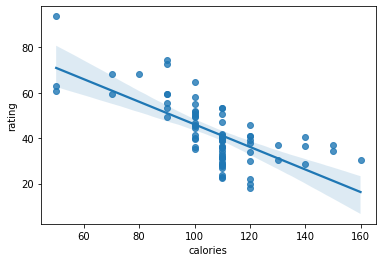

In [17]:
p = sns.regplot(data = df,  
                x = df.calories, 
                y = df.rating
               ) 
p

The weights for z1 are given by (−0.847, 0.532): Means, when x axis move -0.847, y axis move 0.532 along regression (line fit) line. 

In [18]:
import numpy as np
from sklearn.decomposition import PCA

In [23]:
pcs = PCA(n_components=2)

pcs.fit(df[['calories', 'rating']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,22.316462,0.863191,0.863191
1,8.884410,0.136809,1.000000


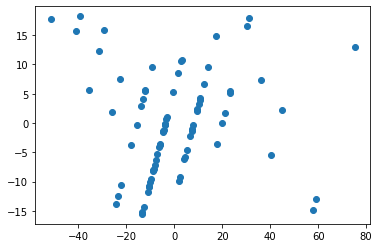

In [28]:
plt.scatter(data[:, 0], data[:, 1]) 

In [20]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,22.32,8.88
Proportion of variance,0.86,0.14
Cumulative proportion,0.86,1.00


In [18]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 86.32% of the total variability and 
* `z2` for the remaining 13.68%. 

Therefore, if we drop `z2 = PC2`, we still maintain 86.32% of the total variability. 

https://www.youtube.com/watch?v=FgakZw6K1QQ 

### Scree Plot

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

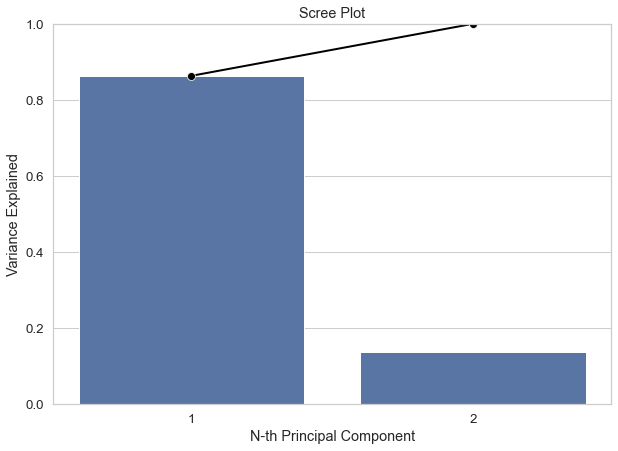

In [20]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [21]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[-0.8471,  0.5315],
       [ 0.5315,  0.8471]])

In [22]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['calories', 'rating']
                                )
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

The weights are used to compute principal component scores, which are the projected values of calories and rating onto the new axes (after subtracting the means). 

* The average calories across the 77 cereals is `106.88` and the average consumer rating is `42.67`.

* The first column is the projection onto z1 using the weights (-0.847, 0.532). 

    * The second column is the projection onto z2 using the weights (0.532, 0.847). 
    
For example:  

First, we need to center the original variables by subtracting column means
(70 − `106.88`)   & (68.4 − `42.67`)

Second multiply them with corresponding Principal components. 

The first score for the 100% Bran cereal (with 70 calories and a rating of 68.4) is 
$$( − 0.847)(70 − 106.88) + (0.532)(68.4 − 42.67) = 44.92$$
$$ Z_i = a_{i1} (X_1 - \bar{X_1}) + a_{i2} (X_2 - \bar{X_2}) + \cdots + a_{in} (X_n - \bar{X_n}) ; i = 1, 2, 3, \cdots n$$

In [23]:
scores = pd.DataFrame(pcs.transform(df[['calories', 'rating']]),
                      columns=['x', 'y']
                      )
scores.head()

,x,y
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


In [24]:
x = (-0.847)*(70-106.88)+(0.532)*(68.4-42.67)

y = (0.531508)*(70-106.88)+(0.847053)*(68.4-42.67)

In [25]:
print('For the PC1\n \t x = ', x, '\n\t y = ', y)

For the PC1
 	 x =  44.92572 
	 y =  2.1926586500000056


In [26]:
scores.x.mean()

1.1880828211573103e-15

In [27]:
scores.y.sum()

-1.3322676295501878e-14

The sum of the variances `var(z1) + var(z2)` is equal to the sum of the variances of the original variables, `var(calories) + var(rating)`.  

In [28]:
scores.x.var() + scores.y.var()

576.9572164702394

In [29]:
df.calories.var() + df.rating.var()

576.9572164702394

In [30]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

86.0

In [31]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Standard deviation,83.764075,70.914255,22.643745,19.181482,8.423228,2.091670,1.699423,0.779635,0.657833,0.370428,0.186441,6.302264e-02,5.333701e-08
Proportion of variance,0.539503,0.386674,0.039425,0.028291,0.005456,0.000336,0.000222,0.000047,0.000033,0.000011,0.000003,3.054014e-07,2.187435e-19
Cumulative proportion,0.539503,0.926177,0.965602,0.993892,0.999348,0.999684,0.999906,0.999953,0.999986,0.999997,1.000000,1.000000e+00,1.000000e+00


### Scree Plot

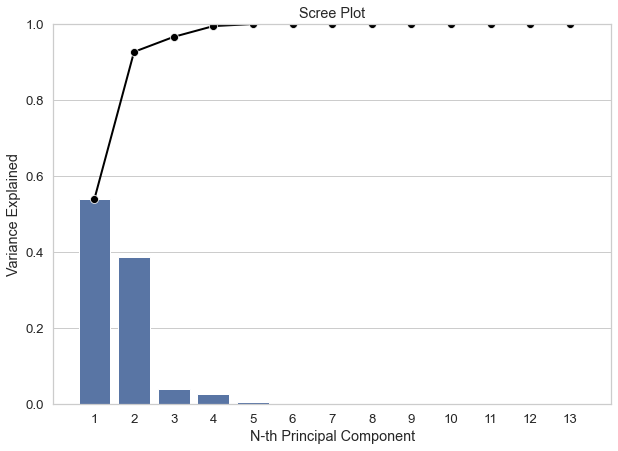

In [32]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Note that the first three components account for more than 96% of the total variation associated with all 13 of the original variables.

In [33]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

97.0

In fact, the first two principal components alone capture 92.6% of the total variation.

In [34]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][1])*100).round(2)

92.62

In [35]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [36]:
pcs.components_

array([[-7.79841812e-02,  7.56780568e-04,  1.01783356e-04,
        -9.80214542e-01,  5.41275498e-03, -1.72462607e-02,
        -2.98886313e-03,  1.34900004e-01, -9.42933187e-02,
         1.54141949e-03, -5.12001742e-04, -5.10111142e-04,
         7.52962922e-02],
       [-9.31158743e-03,  8.80102815e-03,  2.69915215e-03,
         1.40895790e-01,  3.06807512e-02, -1.67832981e-02,
        -2.53485333e-04,  9.86561981e-01,  1.67288404e-02,
         4.36039937e-03,  9.99213791e-04, -1.59101254e-03,
         7.17421528e-02],
       [ 6.29205759e-01,  1.02611603e-03,  1.61957859e-02,
        -1.35901858e-01, -1.81910456e-02,  1.73699816e-02,
         9.77049979e-02,  3.67824989e-02,  6.91977762e-01,
         1.24888415e-02,  3.80595655e-03,  6.94321437e-04,
        -3.07947121e-01],
       [-6.01021463e-01,  3.19990954e-03, -2.52622140e-02,
        -9.68074064e-04,  2.04721894e-02,  2.59482087e-02,
        -1.15480910e-01, -4.21757390e-02,  7.14117998e-01,
         5.64718364e-03, -2.54641448e

In [37]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = cereals_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,0.000757,0.008801,0.001026,0.003200,0.056176
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876


In [38]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = cereals_df.iloc[:, 3:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959,0.118848,0.093857,-0.026191,0.009027,0.064517,0.008975,0.003853,4.193592e-02
protein,0.000757,0.008801,0.001026,0.003200,0.056176,0.112745,0.258103,0.655037,-0.202406,-0.255922,-0.045273,-0.004508,-6.162939e-01
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098,-0.131816,0.372584,-0.117932,0.123749,-0.841440,-0.062438,-0.008603,3.184690e-01
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948,0.022793,0.004508,0.000617,-0.004071,-0.000917,0.000243,0.000233,1.026023e-02
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605,0.262841,0.043114,-0.658776,0.226880,-0.144477,0.021072,0.000811,-6.483602e-01
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267,-0.537837,-0.672432,0.006300,-0.025163,-0.300149,-0.041873,0.014147,-2.056936e-01
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066,0.647923,-0.566975,0.103466,-0.117133,-0.319664,-0.028131,0.019273,1.364878e-01
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151,-0.049999,-0.017959,0.015376,0.001214,0.006339,0.000470,0.000951,6.400483e-03
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009,0.015757,0.012102,0.004025,0.012422,0.000539,-0.001544,0.000790,9.642514e-03
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876,-0.059901,0.092215,-0.327611,-0.934608,-0.046006,0.067769,-0.010328,5.145194e-09


Here, it is clear that: 
* the first principal component is dominated by the sodium content of the cereal: 
  * it has the highest (in this case, positive) weight (-0.980215). 
  * This means that the first principal component is in fact measuring how much sodium is in the cereal. 
  
* The second principal component seems to be measuring the amount of potassium. 


**Since both these variables are measured in `milligrams`, whereas the other nutrients are measured in `grams`, the scale is obviously leading to this result.** 

The variances of potassium and sodium are much larger than the variances of the other variables, and thus the total variance is dominated by these two variances. 

**Normalize before applying PCA!!!**

* Normalize and then performing PCA on the correlation matrix instead of the covariance matrix. 
* Using the correlation matrix means that you are operating on the normalized data. 

In [39]:
from sklearn import preprocessing

#### Normalize the 13 variables due to the different scales of the variables and then perform PCA (or equivalently, we use PCA applied to the correlation matrix)

In [40]:
cereals_df.iloc[:, 3:].head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [41]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [42]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [43]:
pcsSummary_df.iloc[2,6]

0.9302633875160602

* Now we find that we need seven principal components to account for more than 90% of the total variability. 
* The first two principal components account for only 52% of the total variability, and thus reducing the number of variables to two would mean losing a lot of information. 

In [44]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=cereals_df.iloc[:, 3:].columns
                                )
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899,0.255906,0.025595
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749,-0.120752,-0.282705
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893,-0.347967,0.051155
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364,-0.664372,0.283703
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119,-0.064244,-0.112325
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743,0.326393,0.260468
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872,0.152082,-0.227985
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360,-0.025154,-0.148808
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287,-0.129486,-0.294276
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101,0.052044,0.174834


In [45]:
pcsComponents_df.PC1.idxmax()

'fiber'

In [46]:
pcsComponents_df.PC1.nlargest(3)

fiber     0.453490
rating    0.438378
potass    0.401964
Name: PC1, dtype: float64

In [47]:
pcsComponents_df.PC2.idxmin()

'weight'

In [48]:
pcsComponents_df.PC2.nsmallest(3)

weight     -0.450309
calories   -0.393148
sugars     -0.351434
Name: PC2, dtype: float64

> * The cereal is low in calories and the amount per bowl (cups)
> * The cereal high in protein, and potassium. 
> * This type of cereal is associated with a high consumer rating. 

> The second principal component is most affected by the weight of a serving (cups)

> The third principal component by the carbohydrate (carbo) content

In [58]:
print('*'*55,'End','*'*55)

******************************************************* End *******************************************************
